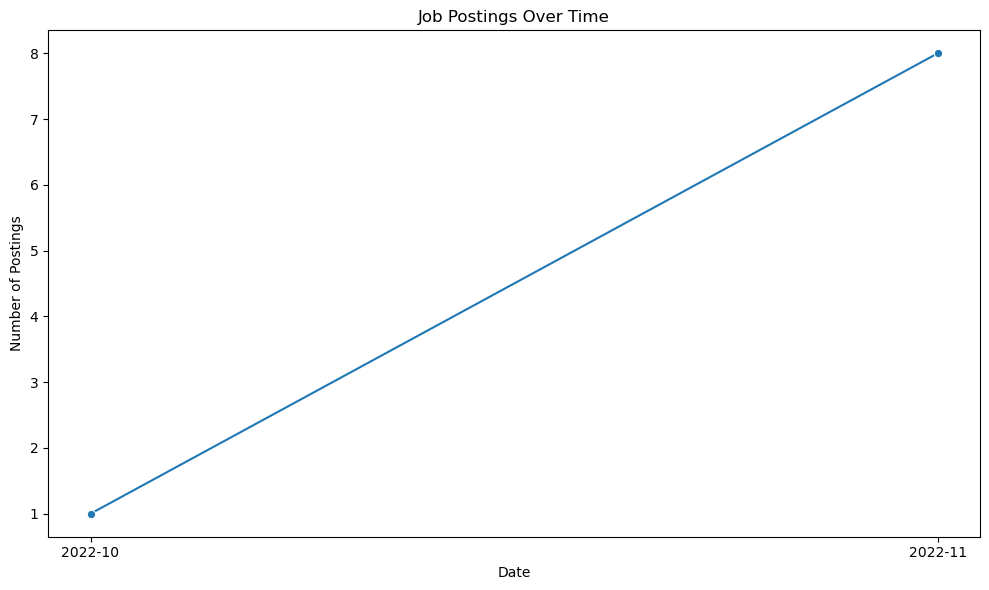

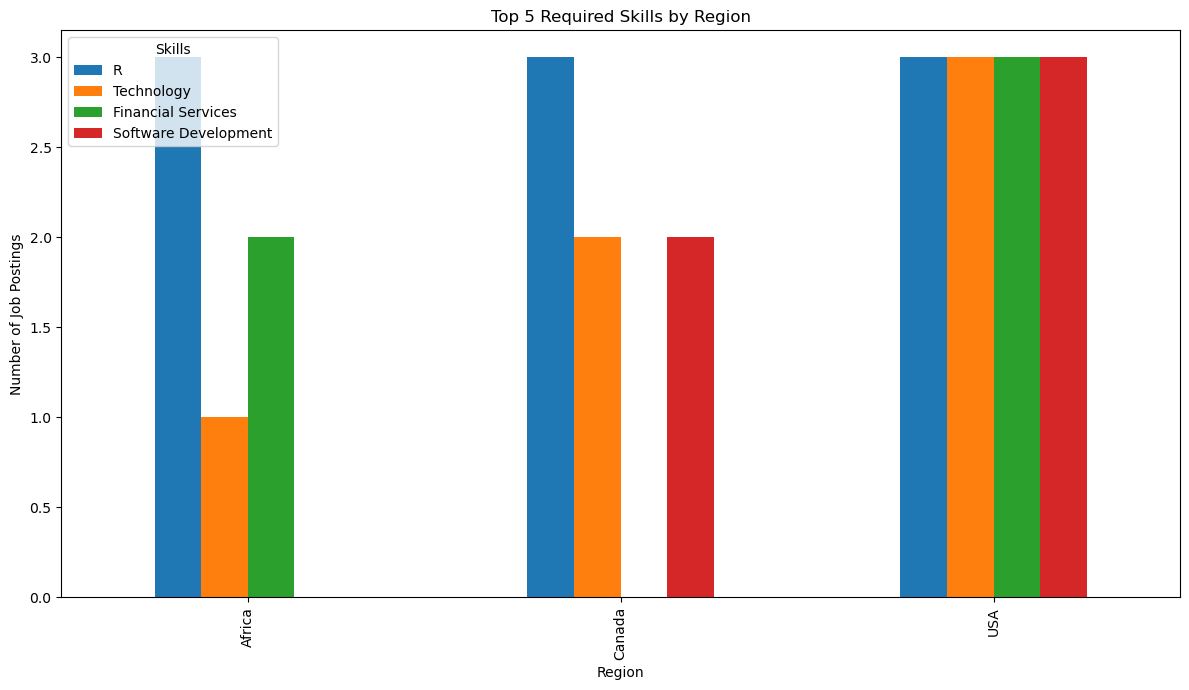

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np

# --- Raw Data ---
data_africa = """title,company,description,onsite_remote,salary,location,criteria,posted_date,link
Data Analyst,NNC,"We are looking for a passionate certified Data Analyst...",onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غیر مطبق'}, {'نوع التوظيف': 'دوام كامل'}, {'المهام الوظیفیة': 'محلل'}, {'المجالات': 'التكنولوجيا والمعلومات والإنترنت'}]",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst-at-nnc-3367161967
Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric company that believes everyone deserves the opportunity to be an entrepreneur and achieve their ambitious goals in life...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employment type': 'Full-time'}, {'Job function': 'Analyst'}, {'Industries': 'Financial Services'}]",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst-at-watu-credit-3332732366
Data Analyst (Credit Risk),Kuda,"Kuda is a fintech on a mission to make financial services accessible, affordable and rewarding for every African on the planet...",onsite,NaN,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Analyst'}, {'Industries': 'Technology, Information and Internet'}]",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst-credit-risk-at-kuda-3369751844
"""

data_canada = """title,company,description,onsite_remote,salary,location,criteria,posted_date,link
Data Analyst,Axonify,"Axonify is an intelligent workforce enablement solution that supports 3.5M frontline workers...",onsite,NaN,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development'}]",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst-at-axonify-3324670516
Data Analyst,B3 Systems,"The ideal candidate will use their passion for big data and analytics to provide insights to the business covering a range of topics...",onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst-at-b3-systems-3361794123
Data Analyst,Wood Mackenzie,"Company DescriptionWood Mackenzie is the global leader in data, analysis and consulting across the energy, chemicals, metals, mining, power and renewables sectors...",onsite,NaN,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development'}]",2022-11-16,https://ca.linkedin.com/jobs/view/data-analyst-at-wood-mackenzie-3356875084
"""

data_usa = """title,company,description,onsite_remote,salary,location,criteria,posted_date,link
Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}]",2022-11-22,https://www.linkedin.com/jobs/view/data-analyst-recent-graduate-at-paypal-3364471019
Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}]",2022-11-22,https://www.linkedin.com/jobs/view/data-analyst-recent-graduate-at-paypal-3364467390
Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that every person has the right to participate fully in the global economy...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}]",2022-11-22,https://www.linkedin.com/jobs/view/data-analyst-at-paypal-3351980313
"""

# --- Load Data ---
df_africa = pd.read_csv(io.StringIO(data_africa))
df_canada = pd.read_csv(io.StringIO(data_canada))
df_usa = pd.read_csv(io.StringIO(data_usa))

df_combined = pd.concat([df_africa, df_canada, df_usa], ignore_index=True)
df_combined['region'] = ['Africa'] * len(df_africa) + ['Canada'] * len(df_canada) + ['USA'] * len(df_usa)

# --- Skill Extraction ---
keywords = ['SQL', 'Python', 'R', 'Tableau', 'Power BI', 'Excel',
            'Technology', 'Software Development', 'Financial Services']

def extract_skills(row):
    text = str(row['description']) + " " + str(row['criteria'])
    skills = [k for k in keywords if k.lower() in text.lower()]
    return skills

df_combined['required_skills'] = df_combined.apply(extract_skills, axis=1)

# --- Job Postings Over Time ---
df_combined['posted_date'] = pd.to_datetime(df_combined['posted_date'])
df_combined['month_year'] = df_combined['posted_date'].dt.to_period('M')
monthly_postings = df_combined.groupby('month_year').size().reset_index(name='count')
monthly_postings['month_year'] = monthly_postings['month_year'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='month_year', y='count', data=monthly_postings, marker='o')
plt.title('Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.tight_layout()
plt.show()

# --- Top Skills by Region ---
df_skills_exploded = df_combined.explode('required_skills')
df_skills_exploded.dropna(subset=['required_skills'], inplace=True)

skills_by_region_counts = df_skills_exploded.groupby(['required_skills', 'region']).size().unstack(fill_value=0)

top_skills = skills_by_region_counts.sum(axis=1).nlargest(5).index
skills_to_plot = skills_by_region_counts.loc[top_skills].astype(int)

skills_to_plot.T.plot(kind='bar', figsize=(12, 7))
plt.title('Top 5 Required Skills by Region')
plt.xlabel('Region')
plt.ylabel('Number of Job Postings')
plt.legend(title='Skills')
plt.tight_layout()
plt.show()
